In [1]:
from nmon import *

### E01 vs ng1,2,3

In [2]:
EC_shunt = 0.18

EJM_EC = 5
EJN_EC = 5


N_ng1 = 20
N_ng2 = 20
N_ng3 = 20

ng1_list = np.linspace(0, 1, N_ng1)
ng2_list = np.linspace(0, 1, N_ng2)
ng3_list = np.linspace(0, 1, N_ng3)

w01_list = np.zeros([N_ng1, N_ng2, N_ng3])

nmon = Nmon(N=2, M=2, EJM=EJM_EC*EC_shunt, EJN=EJN_EC*EC_shunt, EC_shunt=EC_shunt)

for i, ng1 in enumerate(tqdm(ng1_list)):
    for j, ng2 in enumerate(ng2_list):
        for k, ng3 in enumerate(ng3_list):
            for attempt in range(10):
                try:
                    nmon.hamiltonian_calc(flux=0, ng=[ng1, ng2, ng3], make_plot=False, num_levels=3, cutoff=3)
                    w01_list[i, j, k] = nmon.transition_freqs[0]
                except Exception:
                    continue
                if w01_list[i, j, k] != 0:
                    break



100%|██████████| 20/20 [38:12<00:00, 114.64s/it]l_30112\1398150090.py: 25


In [3]:
np.save("./data_arrays_ng/N={}_M={}_EC_shunt={}_w01_list.npy".format(nmon.N, nmon.M, round(nmon.EC_total,2 )), w01_list)

In [4]:
w01_list_ng123 = np.load("./data_arrays_ng/N={}_M={}_EC_shunt={}_w01_list.npy".format(nmon.N, nmon.M, round(nmon.EC_total,2 )))

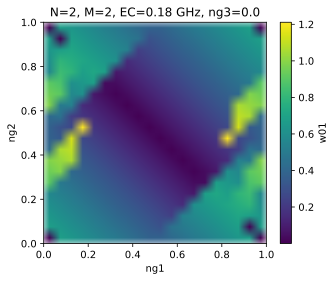

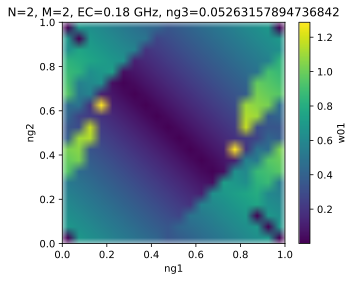

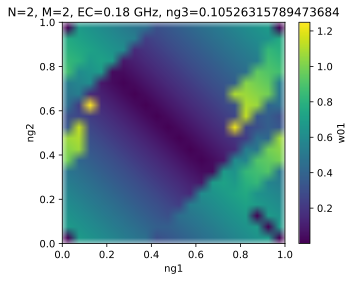

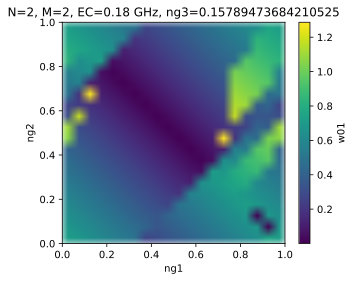

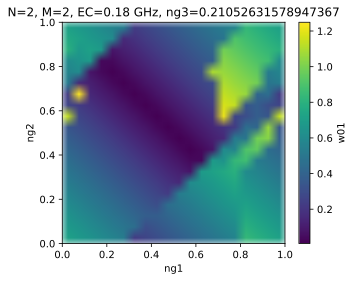

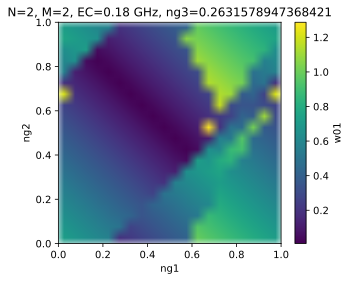

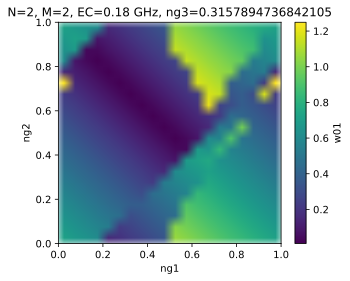

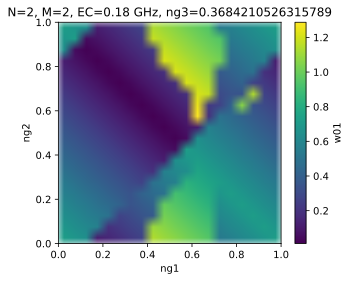

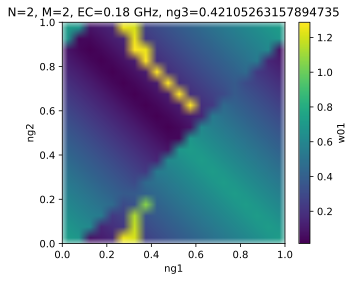

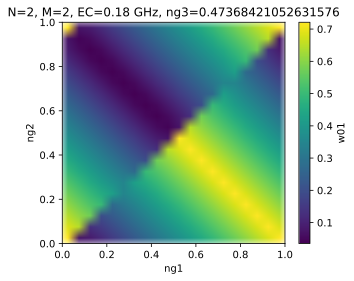

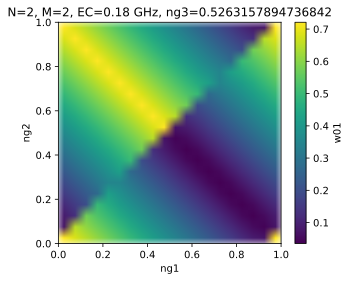

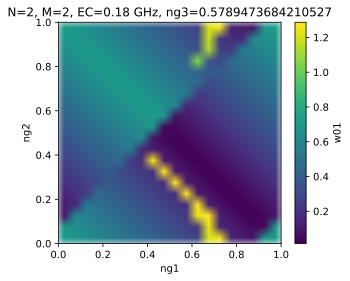

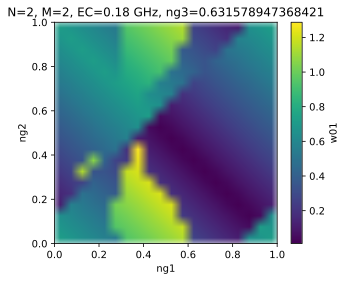

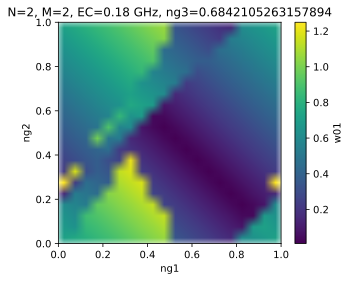

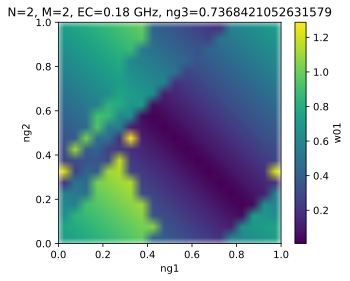

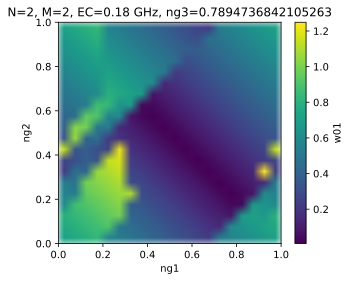

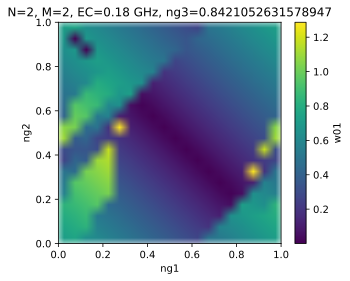

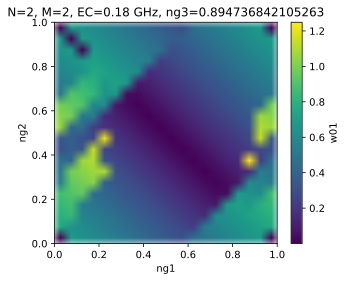

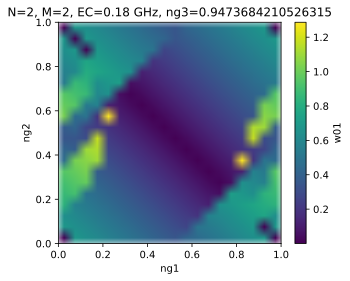

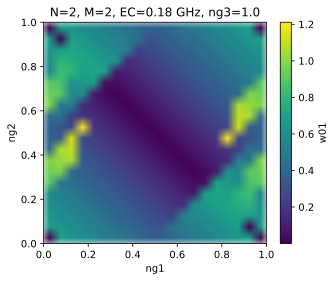

In [5]:
for k, ng3 in enumerate(ng3_list):
    
    w01_list = w01_list_ng123[ :,:, k]

    ng1_grid, ng2_grid = np.meshgrid(ng1_list, ng2_list)

    plt.figure(figsize=(5, 4))
    # Using imshow for pixel plot
    plt.imshow(w01_list, origin='lower', aspect='auto',
            extent=[ng1_list.min(), ng1_list.max(), ng2_list.min(), ng2_list.max()],
            cmap='viridis', interpolation='none')
    plt.colorbar(label='w01')
    plt.xlabel('ng1')
    plt.ylabel('ng2')

    plt.title("N={}, M={}, EC={} GHz, ng3={}".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 ), ng3))
    # plt.xticks(ticks=np.arange(len(EJM_list[::]))[::2], labels=[f'{round(i/EC_total,1)}' for i in EJM_list[::2]])
    # plt.yticks(ticks=np.arange(len(EJN_list[::]))[::2], labels=[f'{round(i/EC_total,1)}' for i in EJN_list[::2]])
    # plt.savefig("./data_arrays_ng/N={}_M={}_EC_shunt={}_w01_list.pdf".format(nmon.N, nmon.M, round(nmon.EC_shunt, 2)))
    plt.show()